# ANALIZA REZULTATOV IGER IZ GO TURNIRJEV

Analizirali bomo podatke o igrah iz Go turnirjev. Vprašali se bomo, katera barva največ zmaguje, kak vpliv ima rang igralca na verjetnost zmage in kako dobro so se različne države izkazale na mednarodnih turnirjih. Spremljali bomo tudi, kako se odgovori na ta vprašanja spreminjajo skozi leta. Ogledali si bomo, kdo so najboljši igralci. Za konec bomo poskušali iz imena igralca predvideti njegovo narodnost.

Go je starodavna kitajska igra za dva igralca. Eden izmed igralcev igra s črnimi kamni, drugi pa z belimi. Igro začne igralec s črnimi kamni. Običajno se igra na plošči velikosti 19x19, pogosto pa tudi na ploščah velikosti 9x9 in 13x13. Igra ima 3 osnovna pravila:
- Igralec, ki je na potezi, na eno izmed prostih križišč položi kamen svoje barve. S tem je njegova poteza končana.
- Če je kamen povsem obkoljen s kamni druge barve tako, da se ne dotika nobenega praznega križišča, je pobran s plošče. Kamni iste barve, ki ležijo na sosednjih križiščih, si delijo prazna križišča.
- Igra se konča, ko se oba igralca strinjata, da nimata več smiselnih potez. Vsak igralec je dosegel število točk, ki je enako številu pobranih nasprotnikovih kamnov skupaj s številom praznih križišč, ki mu pripadajo. Belemu igralcu se, ker ima prvo potezo črni, dodeli dodatnih 7.5 točk. Zmaga igralec z več točkami. Prazno križišče pripada igralcu, če ga obkroža <i>živa</i> skupina njegovih kamnov. Za skupino kamnov pravimo, da je živa, če je nasprotnik ne more pobrati, torej če lahko zagotovi, da bodo kamni vedno v stiku z vsaj dvema praznima križiščema. Le-tem ključnim križiščem pravimo <i>oči</i>.

**Nalaganje in priprava podatkov**

Najprej naložimo knjižnice, ki jih bomo uporabljali. S knjižnico pandas bomo upravljali s podatki, numpy nam bo pomagal pri računanju z matrikami, s knjižnico matplotlib pa bomo risali grafe.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Nato naložimo podatke, ki jih bomo uporabljali. 
V datoteki podatki_iz_turnirjev.csv imamo shranjenih 104.508 iger. Za vsako vemo, kdaj je bila igrana, na katerem turnirju, kateri igralec je bil bel in kateri črni, kdo je zmagal in kakšna je bila zmaga.
V datoteki podatki_o_narodnosti.csv imamo shranjenih 2221 igralcev. Za vsakega poznamo njegovo narodnost.

In [4]:
podatki_iz_turnirjev = pd.read_csv("podatki/podatki_iz_turnirjev.csv")
podatki_o_narodnosti = pd.read_csv("podatki/podatki_o_narodnosti.csv")

In [5]:
podatki_iz_turnirjev

,leto,mesec,dan,turnir,igralec_crni,igralec_crni_rang,igralec_beli,igralec_beli_rang,zmagovalec,tip_zmage
0,1969,12,29,"1st All-Japan First Place, challenger decision...",Fujisawa Hideyuki,9.0,Sugiuchi Masao,9.0,B,8.5
1,1969,12,26,"17th Japanese NHK Cup, round 2",Go Seigen,9.0,Fujisawa Hideyuki,9.0,W,8.5
2,1969,12,24,"9th Japanese Old Meijin, league",Honda Kunihisa,8.0,Takagawa Kaku,9.0,B,3
3,1969,12,24,"8th Japanese Judan, title match #3",Sakata Eio,9.0,Otake Hideo,8.0,W,R
4,1969,12,18,"9th Japanese Judan, preliminary",Kudo Norio,8.0,Takemiya Masaki,5.0,W,R
...,...,...,...,...,...,...,...,...,...,...
104503,2022,1,1,"Year 2021 Korean League, round 6",Choi Cheolhan,9.0,Park Yeonghun,9.0,W,R
104504,2022,1,1,"Year 2021 Korean League, round 6",Na Hyun,9.0,Byun Sangil,9.0,B,R
104505,2022,1,1,"Year 2021 Korean League, round 6",Park Geunho,5.0,Park Junghwan,9.0,W,R
104506,2022,1,1,"Year 2021 Korean League, round 6",Kim Jinhwi,5.0,Lee Changseok,8.0,W,R


In [6]:
podatki_o_narodnosti

,Drzava,Igralec
0,Kitajska,An Dongxu
1,Kitajska,Ao Liting
2,Kitajska,Bai Baoxiang
3,Kitajska,Bai Guangyuan
4,Kitajska,Bai Yulin
...,...,...
2216,AI,Golaxy
2217,AI,Google DeepMind AlphaGo
2218,AI,Leela Zero
2219,AI,PhoenixGo


Preden začnemo z analizo moramo nekatere podatke obdelati. Nekateri igralci nimajo ranga (amaterski igralci, Insei ter AI), zato njihov rang nastavimo na 0, nato pa vse range spremenimo v tip int. Prav tako podatke o letu, mesecu in dnevu spremenimo v tip int. 

Na Kitajskem, Japonskem, v Tajvanu in v Koreji obstajajo profesionalni igralci Go-ja. Podobni sistemi so se pred kratkim vzpostavili tudi v Evropi in Ameriki. Oznaka Ama v podatkih označuje amaterskega igralca, Insei pa je japonsko ime za vajenca, ki se uči, da bi postal profesionalec.

Rangi za amaterske igralce se štejejo od 30kyu do 1kyu in od 1dan do 9dan. Profesionalci imajo range od 1dan do 9dan. Da se profesionalne range loči od amaterskih, se običajno označujejo z 1p, 2p, ...

In [8]:
podatki_iz_turnirjev['igralec_crni_rang'] = podatki_iz_turnirjev['igralec_crni_rang'].fillna(0)
podatki_iz_turnirjev['igralec_beli_rang'] = podatki_iz_turnirjev['igralec_beli_rang'].fillna(0)
podatki_iz_turnirjev['tip_zmage'] = podatki_iz_turnirjev['tip_zmage'].fillna(0)
podatki_iz_turnirjev.leto = podatki_iz_turnirjev.leto.astype(int)
podatki_iz_turnirjev.mesec = podatki_iz_turnirjev.mesec.astype(int)
podatki_iz_turnirjev.dan = podatki_iz_turnirjev.dan.astype(int)
podatki_iz_turnirjev.igralec_beli_rang = podatki_iz_turnirjev.igralec_beli_rang.astype(int)
podatki_iz_turnirjev.igralec_crni_rang = podatki_iz_turnirjev.igralec_crni_rang.astype(int)

Definirajmo nekaj funkcij, s katerimi bomo lažje dostopali do informacij. dobi_leto izbere podatke iz želenega leta, izberi_polja izbere polja, ki nas zanimajo. dobi_stevilo_iger prešteje, koliko je iger.

In [9]:
def dobi_leto(leto, podatki):
    relevantni_podatki = podatki[podatki.leto == leto]
    return relevantni_podatki

def izberi_polja(polja, podatki):
    return podatki[polja]

def dobi_stevilo_iger(podatki):
    return podatki.shape[0]

**Zmagovanje barv skozi leta**

Najprej si oglejmo, kako sta barvi zmagovali čez leta

In [10]:
bela_po_letih = []
crna_po_letih = []
for leto in range(1969, 2023):
    podatki = dobi_leto(leto, podatki_iz_turnirjev)
    podatki = podatki[podatki.zmagovalec != "Void"]
    podatki = izberi_polja(["zmagovalec"], podatki)
    stevilo_iger = dobi_stevilo_iger(podatki)
    podatki = podatki[podatki.zmagovalec == "W"]
    procent = dobi_stevilo_iger(podatki) / stevilo_iger
    bela_po_letih.append(procent)
    crna_po_letih.append(1 - procent)

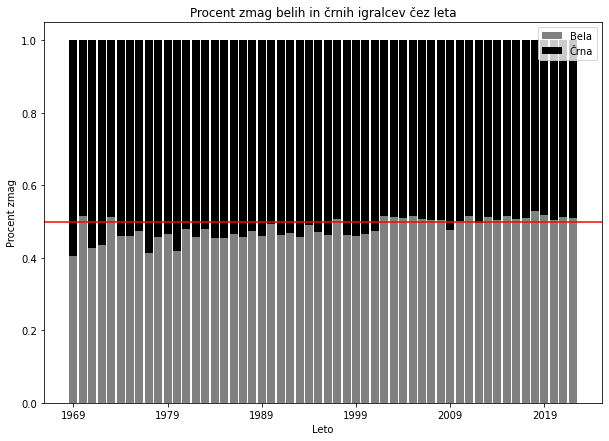

In [34]:
width = 0.85
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar([i for i in range(1969, 2023)], bela_po_letih, width, color = "gray")
p2 = plt.bar([i for i in range(1969, 2023)], crna_po_letih, width, bottom = bela_po_letih, color = "black")
p3 = plt.axhline(y = 0.5, color = "red")
plt.ylabel('Procent zmag')
plt.title('Procent zmag belih in črnih igralcev čez leta')
plt.xticks([i for i in range(1969, 2023, 10)])
plt.xlabel("Leto")
plt.legend((p1[0], p2[0]), ('Bela', 'Črna'))

Vidimo, da je do začetka 21. stoletja večinoma zmagovala črna, od takrat dalje pa obe barvi zmagujeta približno enako, z rahlo prednostjo bele. Zakaj pride do teh razlik v zmagah? V Go-ju prvo potezo odigra črni igralec. Zato beli dobi v zameno "komi", dodatne točke. Velikost komija se je skozi leta spreminjala. V letih 1969 do 2000 je bil 4.5 ali 5.5 točk, v začetku 21. stoletja pa so ga povečali na 6.5 oziroma 7.5 točk. Po vsej verjetnosti je ta razlika v velikosti komija razlog, da je najprej več zmagovala črna, nato pa sta barvi postali izenačeni.

**Pomen ranga skozi leta**

Pomen ranga v Go-ju se je skozi zgodovini spreminjal. Čeprav je od vedno naziv profesionalnega igralca, še posebej pa rang 9p, bil pokazatelj velike mojstrskosti, ga po pridobitvi igralci ne izgubijo. Posledično so z leti mlajši igralci z nižjim rangom lahko premagali starejše.

In [19]:
verjetnost = []
for leto in range(1969, 2023):
    podatki = dobi_leto(leto, podatki_iz_turnirjev)
    stevilo_iger = podatki[(podatki.igralec_crni_rang > podatki.igralec_beli_rang) | (podatki.igralec_crni_rang < podatki.igralec_beli_rang)].size
    podatki = izberi_polja(["igralec_crni_rang", "igralec_beli_rang", "zmagovalec"], podatki)
    verjetnost.append(podatki[
        (podatki.igralec_crni_rang > podatki.igralec_beli_rang) & (podatki.zmagovalec == "W")
        |
        (podatki.igralec_crni_rang < podatki.igralec_beli_rang) & (podatki.zmagovalec == "B")].size / stevilo_iger)

Text(0.5, 1.0, 'Verjetnost zmage igralca z nižjim rangom')

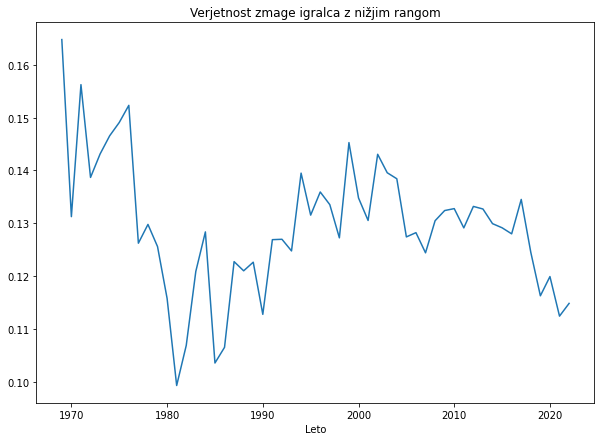

In [33]:
fig = plt.subplots(figsize =(10, 7))
p = plt.plot([i for i in range(1969, 2023)], verjetnost)
plt.xlabel("Leto")
plt.title("Verjetnost zmage igralca z nižjim rangom")

V osemdesetih in devedestih letih je prišlo do inflacij rangov, zaradi česar so države okoli leta 2005 spremenile način ocenjevanja. Nastop umetnih inteligenc po letu 2016 je zaostril razlike med najboljšimi igralci in ostalimi.

**Zmagovanje držav skozi leta**

Poglejmo, kako so države zmagovale cez leta.

In [70]:
drzave_po_letih = [{"Kitajska" : 0, "Japonska" : 0, "Koreja" : 0, "Tajvan" : 0, "Ostali" : 0, "AI" : 0, "vse_leta" : 0} for _  in range(54)]
for leto in range(1969, 2023):
    podatki = dobi_leto(leto, podatki_iz_turnirjev)
    podatki = izberi_polja(["igralec_crni", "igralec_beli", "zmagovalec"], podatki)
    podatki = podatki[podatki.zmagovalec != "Void"]
    for ind in podatki.index:
        if podatki["zmagovalec"][ind] == "W":
            igralec_z = podatki["igralec_beli"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
            igralec_p = podatki["igralec_crni"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
        else:
            igralec_z = podatki["igralec_crni"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
            igralec_p = podatki["igralec_beli"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
        drzava_z = podatki_o_narodnosti[podatki_o_narodnosti["Igralec"] == igralec_z].iat[0, 0]
        drzava_p = podatki_o_narodnosti[podatki_o_narodnosti["Igralec"] == igralec_p].iat[0, 0]
        if drzava_p != drzava_z:
            drzave_po_letih[leto - 1969][drzava_z] += 1
            drzave_po_letih[leto - 1969]["vse_leta"] += 1

In [ ]:
drzave_cez_leta = {"Kitajska" : [], "Japonska" : [], "Koreja" : [], "Tajvan" : [], "Ostali" : [], "AI" : []}
for leto in drzave_po_letih:
    for drzava in ["Kitajska", "Japonska", "Koreja", "Tajvan", "Ostali", "AI"]:
        if leto["vse_leta"] != 0:
            drzave_cez_leta[drzava].append(leto[drzava] / leto["vse_leta"])
        else:
            drzave_cez_leta[drzava].append(0)

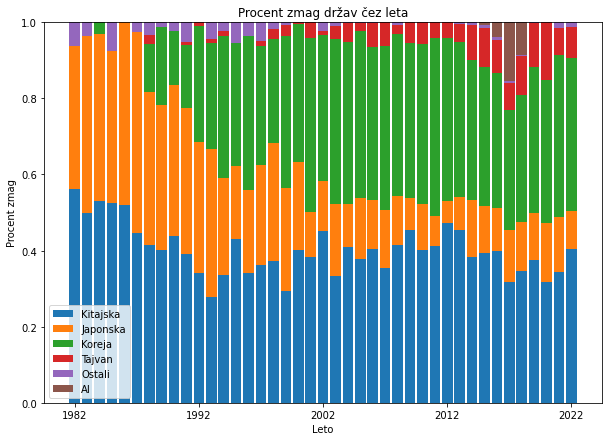

In [79]:
width = 0.85
fig = plt.subplots(figsize = (10, 7))
p1 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["Kitajska"][13:], width)
bottoms = drzave_cez_leta["Kitajska"][13:]
p2 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["Japonska"][13:], width, bottom = bottoms)
bottoms = [x + y for x, y in zip(bottoms, drzave_cez_leta["Japonska"][13:])]
p3 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["Koreja"][13:], width, bottom = bottoms)
bottoms = [x + y for x, y in zip(bottoms, drzave_cez_leta["Koreja"][13:])]
p4 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["Tajvan"][13:], width, bottom = bottoms)
bottoms = [x + y for x, y in zip(bottoms, drzave_cez_leta["Tajvan"][13:])]
p5 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["Ostali"][13:], width, bottom = bottoms)
bottoms = [x + y for x, y in zip(bottoms, drzave_cez_leta["Ostali"][13:])]
p6 = plt.bar([i for i in range(1982, 2023)], drzave_cez_leta["AI"][13:], width, bottom = bottoms)
plt.ylabel('Procent zmag')
plt.title('Procent zmag držav čez leta')
plt.xticks([i for i in range(1982, 2023, 10)])
plt.xlabel("Leto")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('Kitajska', 'Japonska', "Koreja", "Tajvan", "Ostali", "AI"))

Graf začnemo šele leta 1982, saj je bilo pred tem zelo malo mednarodnih iger.

Do sedemdesetih let 20. stoletja je Japonska dominirala svet Go-ja. Nato sta Kitajska in Koreja postavili svoja profesionalna sistema. Od tedaj naprej je Japonska začela zaostajati. Vodilno vlogo je najprej prevzela Kitajska, nato pa je z legendarnimi igralci kot so Lee Changho, Lee Sedol in Cho Hun-Hyun v svetovni vrh stopila še Koreja.

**Najboljši igralci**

Oglejmo si, kateri igralci so skozi zgodovino dosegli najvišji delž zmag.

In [54]:
podatki = izberi_polja(["igralec_crni", "igralec_beli", "zmagovalec"], podatki_iz_turnirjev)
rezultati_igralcev = {}
podatki = podatki[podatki.zmagovalec != "Void"]
for ind in podatki.index:
    if podatki["zmagovalec"][ind] == "W":
        igralec_z = podatki["igralec_beli"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
        igralec_p = podatki["igralec_crni"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()  
    else:
        igralec_z = podatki["igralec_crni"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
        igralec_p = podatki["igralec_beli"][ind].removesuffix("NR").removesuffix("Ama").removesuffix("Sr").removesuffix("Insei").strip()
    if igralec_z in rezultati_igralcev.keys():
        rezultati_igralcev[igralec_z] = [rezultati_igralcev[igralec_z][0] + 1, rezultati_igralcev[igralec_z][1] + 1]
    else:
        rezultati_igralcev[igralec_z] = [1, 1]
    if igralec_p in rezultati_igralcev.keys():
        rezultati_igralcev[igralec_p] = [rezultati_igralcev[igralec_p][0], rezultati_igralcev[igralec_p][1] + 1]
    else:
        rezultati_igralcev[igralec_p] = [0, 1]

Da ne bomo v statistiko vključili igralcev, ki so odigrali le malo iger in imajo zato visok procent zmag, se omejimo na tiste z vsaj 50 vnosi.

In [55]:
wr_igralcev = {}
for igralec in rezultati_igralcev.keys():
    if rezultati_igralcev[igralec][1] >= 50:
        wr_igralcev[igralec] = rezultati_igralcev[igralec][0] / rezultati_igralcev[igralec][1]
najbolsih_deset = sorted(wr_igralcev, key = wr_igralcev.get, reverse = True)[:10]

<BarContainer object of 10 artists>

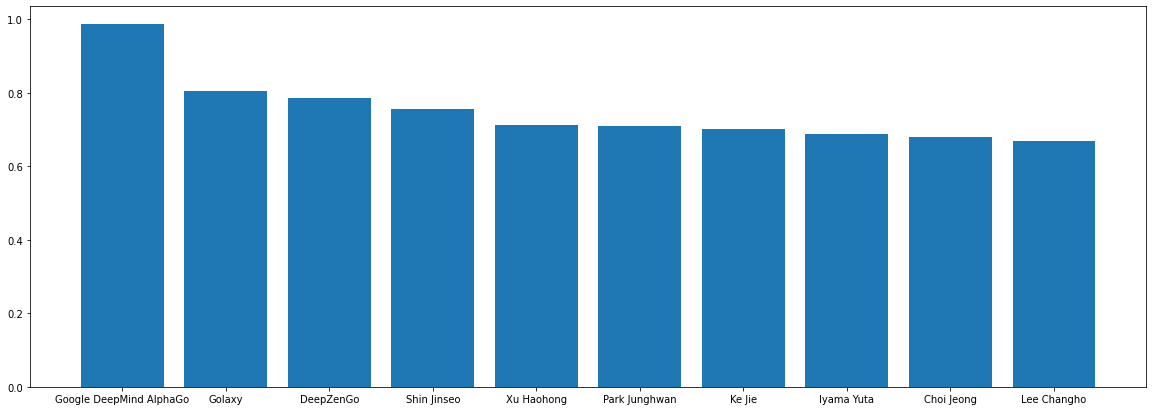

In [58]:
fig = plt.subplots(figsize = (20, 7))
plt.bar(najbolsih_deset, [wr_igralcev[igralec] for igralec in najbolsih_deset])

Prva tri mesta zasedajo umetne intelegence. Te od leta 2016, ko je Googlov Alpha Go premagal svetovnega prvaka Lee Sedola, dominirajo. Posledica tega je, da so na mestih od 4 do 9 igralci, rojeni po letu 2000. Ti se od leta 2016 dalje učijo stila igranja najboljših programov in tako dosegajo izredno visoke procente zmag. Posebej gre omeniti Shin Jinseoja, ki je zadnja 4 leta igralec z najvišjo ELO oceno. 

Edini človeški igralec na seznamu, ki ni rojen po letu 2000, je Lee Changho. On je bil igralec z najvišjo ELO oceno med leti 1990 in 2006. 

**Ugotavljanje narodnosti igralca iz njegovega imena**

Z uporabo nevronske mreže bomo poskusili iz imena igralca ugotoviti, iz katere države prihaja.

*Kako deluje nevronska mreža?*

Nevronska mreža je algoritem, ki iterativno posodablja svoje parametre in s tem poskuša modelirati nelinearno zvezo med vhodnimi in izhodnimi podatki.

Naša nevronska mreža ima 4 sloje, en vhodni, en izhodni in 2 skrita sloja. Ko sprejme vhodne podateke, funkcija forward_prop iz njih dobi mrežino klasifikacijo, glede na sledeče enačbe.
$$Z_1 = W_1\cdot X + b_1$$
$$A_1 = ReLU(Z_1)$$
$$Z_2 = W_1\cdot A_1 + b_2$$
$$A_2 = ReLU(Z_2)$$
$$Z_3 = W_3\cdot A_3 + b_3$$
$$A_3 = softmax(Z_3)$$
Pri tem so $W_i$ matrike velikosti $m\times n$ in $b_i$ vektorji velikosti $m\times 1$. Funkcija $ReLU$ vrne vnešeni podatek, če je večji ali enak 0, in 0 sicer. Funkcija $softmax$ deluje po predpisu $softmax(\hat{x}) = [\frac{e^{x_1}}{\sum_i e^{x_i}}, \frac{e^{x_2}}{\sum_i e^{x_i}}, \dots, \frac{e^{x_n}}{\sum_i e^{x_i}}]$

Nato primerjamo mrežino klasifikacije s pravimi odgovori. To nam poda napake zadnjega sloja. S sledečimi formulami nato preračunamo, kak prispevek k njim so imele parametri mreže. To opravi funkcija backprop. 

$$dZ_3 = A_3 - Y$$
$$dW_3 = \frac{1}{m}dZ_3\cdot A_2^T$$
$$db_3 = \frac{1}{m}\sum_i (dZ_3)_i$$

$$dZ_2 = W_3^T\cdot dZ_3 \cdot (ReLU)'(Z_2)$$
$$dW_2 = \frac{1}{m}dZ_2\cdot A_1^T$$
$$db_2 = \frac{1}{m}\sum_i (dZ_2)_i$$

$$dZ_1 = W_2^T\cdot dZ_2 \cdot (ReLU)'(Z_1)$$
$$dW_1 = \frac{1}{m}dZ_1\cdot X^T$$
$$db_1 = \frac{1}{m}\sum_i (dZ_1)_i$$

Pri tem $m$ predstavlja število primerov, ki smo jih poslali skozi mrežo.

Na koncu funkcija update_params posodobi parametre mreže glede na zgoraj izračunane prispevke.
$$W'_3 = W_3 - \alpha\cdot dW_3$$
$$b'_3 = b_3 - \alpha\cdot db_3$$
$$W'_2 = W_2 - \alpha\cdot dW_2$$
$$b'_2 = b_2 - \alpha\cdot db_2$$
$$W'_1 = W_1 - \alpha\cdot dW_1$$
$$b'_1 = b_1 - \alpha\cdot db_1$$
Pri tem je $\alpha$ hiperparameter, imenovan hitrost učenja, ki ga določimo ročno.

Nato funkcija gradient_descent to iterativno ponavlja.

*Implementacija*

Najprej moramo imena spremeniti v obliko, ki jo nevronska mreža lahko sprejme. Vsak podatek bomo predstavili z vektorjem. Na prvem imestu je indeks države, nato pa vsako črko imena predstavimo z njegovo ASCII številko. Podatke še normaliziramo.

In [59]:
max_lenght = 0
data = podatki_o_narodnosti[(podatki_o_narodnosti.Drzava != "Ostali") & (podatki_o_narodnosti.Drzava != "AI")]
num_names = 0
for ind in data.index:
    num_names += 1
    name_lenght = len(data["Igralec"][ind])
    max_lenght = max_lenght if max_lenght > name_lenght else name_lenght

index_dict = {"Kitajska" : 0, "Japonska" : 1, "Koreja" : 2, "Tajvan" : 3}

encoded_names = []
for ind in data.index:
    encoded_name = np.zeros(max_lenght + 1)
    encoded_name[0] = int(index_dict[data["Drzava"][ind]])
    for letter in range(0, len(data["Igralec"][ind])):
        encoded_name[letter + 1] = ord(data["Igralec"][ind][letter]) / 127
    encoded_names.append(encoded_name)
encoded_names = np.asarray(encoded_names)

Podatke premešamo, nato pa jih razdelimo v tiste, na katerih se bo mreža učila, ter na tiste, na katerih bomo preverjali natančnost. S testiranjem natančnosti na ločenih podatkih se prepričamo, da je program res našel način za klasifikacijo, torej da se ni le naučil pravega odgovora za vsak primer posebej.

In [60]:
np.random.shuffle(encoded_names)
data_test = encoded_names[0:210].T
Y_test = data_test[0]
X_test = data_test[1:]

data_train = encoded_names[210:].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:]

Definiramo funkcije, ki jih bomo uporabljali pri učenju. Funkcija init_params določi začetne parametre. Funkcije ReLU, deriv_ReLU, softmax, forward_prop, backprop in update_params opravljajo pripadajočo nalogo, opisano zgoraj. Funkcija one_hot sprejme pravilno klasifikacijo $i$ in vrne vektor, ki ima na $i$-tem mestu vrednost 1 in drugje 0. 

In [61]:
def init_params():
    W1 = np.random.rand(10, 20) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(4, 10) - 0.5
    b3 = np.random.rand(4, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return Z > 0

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backprop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

Definiramo funkcijo gradientnega spusta ter pomožne funkcije za preverjanje natančnosti. 

In [62]:
def get_predictions(A):
    return np.argmax(A, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backprop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2, W3, b3

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return A3

Nevronsko mrežo učimo in dobimo končne parametre.

In [68]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, iterations = 500, alpha = 0.001)

Iteration:  0
Accuracy:  0.23064770932069512
Iteration:  10
Accuracy:  0.23275408109531331
Iteration:  20
Accuracy:  0.2285413375460769
Iteration:  30
Accuracy:  0.2285413375460769
Iteration:  40
Accuracy:  0.22643496577145866
Iteration:  50
Accuracy:  0.22538177988414956
Iteration:  60
Accuracy:  0.2238020010531859
Iteration:  70
Accuracy:  0.2211690363349131
Iteration:  80
Accuracy:  0.21590310689836756
Iteration:  90
Accuracy:  0.2132701421800948
Iteration:  100
Accuracy:  0.2132701421800948
Iteration:  110
Accuracy:  0.2132701421800948
Iteration:  120
Accuracy:  0.215376513954713
Iteration:  130
Accuracy:  0.21642969984202212
Iteration:  140
Accuracy:  0.21695629278567669
Iteration:  150
Accuracy:  0.21379673512374933
Iteration:  160
Accuracy:  0.21379673512374933
Iteration:  170
Accuracy:  0.2143233280674039
Iteration:  180
Accuracy:  0.21379673512374933
Iteration:  190
Accuracy:  0.2132701421800948
Iteration:  200
Accuracy:  0.2132701421800948
Iteration:  210
Accuracy:  0.2127435

In [69]:
get_accuracy(get_predictions(X_test), Y_test)

0.047619047619047616

Rezultati mreže so slabi. Razlogov za to je več. Vrsta mreže in predpriprava podatkov verjetno nista primerna za besedne vhodne podatke. Samih podatkov je relativno malo. Vlogo lahko igra tudi izbira aktivacijske funkcije ReLU, saj je zelo podobna linearni.

**Zaključek**

Ugotovili smo, kako sta skozi čas zmagovali bela in črna barva. Raziskali smo vpliv ranga igralcev na zmagovalca in spremljali rezultate držav na mednarodnih tekmovanjih skozi čas. Poiskali smo najbolše igralce ter razmislili, zakaj nova generacija profesionalcev tako prednjači po procentu zmag.

Za konec smo poskusili naučiti nevronsko mrežo, da bi znala igralce klasificirati po narodnosti glede na ime. Zaradi številnih slabih izbir žal nismo bili uspešni.